In [1]:
import biotite.structure as struc
import numpy as np

from biotite.structure.io.pdb import PDBFile
from protstruc.pdb import ChothiaAntibodyPDB
from protstruc import AntibodyStructureBatch
from protstruc.general import standard_heavy_atom_names

In [2]:
pdb = PDBFile.read('8gpi.pdb')
structure = pdb.get_structure(model=1)

In [13]:
sb = AntibodyStructureBatch.from_pdb(
    '8dtk.pdb', heavy_chain_id=['C'], light_chain_id=['B'], antigen_chain_ids=[['A']], numbering_scheme='chothia'
)

In [6]:
import matplotlib.pyplot as plt

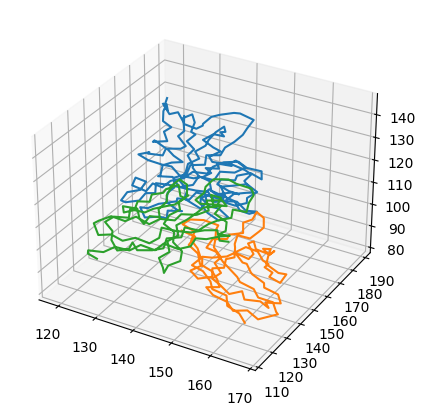

In [17]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

xyz = sb.get_xyz()

chain_idx = sb.get_chain_idx()[0]
for idx in np.unique(chain_idx):
    mask = chain_idx == idx
    ax.plot(
        xyz[0, mask, 1, 0],
        xyz[0, mask, 1, 1],
        xyz[0, mask, 1, 2],
    )

In [8]:


sb = ChothiaAntibodyPDB.read_pdb('8gpi.pdb', heavy_chain_id='H', light_chain_id='L', antigen_chain_ids=['Y', 'S'])

In [9]:
sb.get_atom_xyz_mask()

AttributeError: 'ChothiaAntibodyPDB' object has no attribute 'get_atom_xyz_mask'

In [ ]:
structure_fv = structure[(structure.chain_id == 'H') | (structure.chain_id == 'L')]

In [ ]:
res.ins_code[0]

''

In [ ]:
import torch

In [ ]:
torch.tensor(atom.coord).dtype

torch.float32

In [ ]:
for i, res in enumerate(struc.residue_iter(structure_fv)):
    print(f'New residue {res.chain_id}')

    for atom in res:
        atom.x
    print(res)

    break

New residue ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']


AttributeError: 'Atom' object has no attribute 'x'

In [ ]:
import pandas as pd

In [ ]:
pd.Series(structure_fv.ins_code).unique()

array(['', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'],
      dtype=object)

In [ ]:
structure.res_id > 10

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
d = {'GLU': 0}
np.isin(structure.res_name, list(d.keys()))

array([ True, False, False, ...,  True,  True,  True])

In [ ]:
structure.shape

(20265,)

In [ ]:
struc.get_chain_masks(structure, 0).shape

TypeError: len() of unsized object